**Data Exploration and Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mutual_info_score

1. Loading the Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [3]:
housing_data = pd.read_csv('housing.csv')

In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_data.shape

(20640, 10)

In [6]:
housing_data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [7]:
housing_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [8]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Handling Missing Values**

In [9]:
numerical_cols = housing_data.select_dtypes(include=['float64', 'int64']).columns
housing_data[numerical_cols] = housing_data[numerical_cols].fillna(housing_data[numerical_cols].median())

categorical_cols = housing_data.select_dtypes(include=['object']).columns
housing_data[categorical_cols] = housing_data[categorical_cols].fillna(housing_data[categorical_cols].mode().iloc[0])

**Removing Duplicates**

In [10]:
housing_data = housing_data.drop_duplicates()


**Handling Outliers Using the IQR Method**

In [11]:
Q1 = housing_data[numerical_cols].quantile(0.25)
Q3 = housing_data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
housing_data = housing_data[~((housing_data[numerical_cols] < lower_bound) |
                              (housing_data[numerical_cols] > upper_bound)).any(axis=1)]

**Feature Engineering**

In [12]:
housing_data['rooms_per_household'] = housing_data['total_rooms'] / housing_data['households']
housing_data['population_per_household'] = housing_data['population'] / housing_data['households']

**Encoding Categorical Variables**

In [13]:
housing_data = pd.get_dummies(housing_data, drop_first=True)

**Target Variable Analysis**

Text(0.5, 1.0, 'Target Variable Distribution: Median House Value')

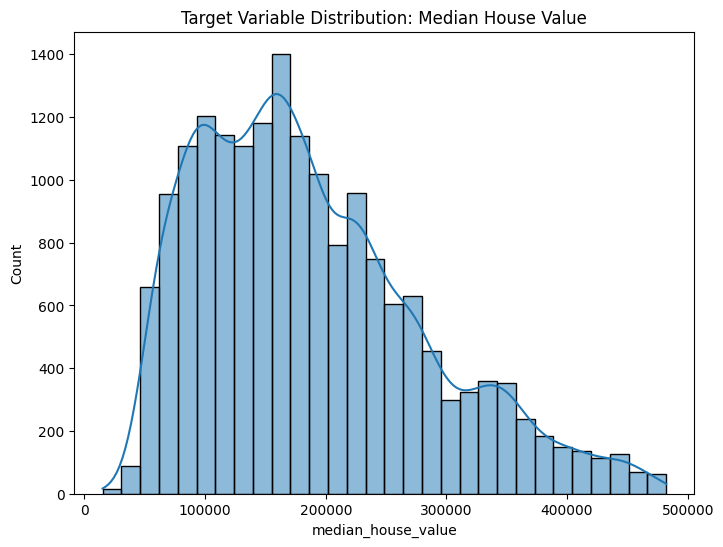

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(housing_data['median_house_value'], kde=True, bins=30)
plt.title("Target Variable Distribution: Median House Value")

**Correlation Analysis**

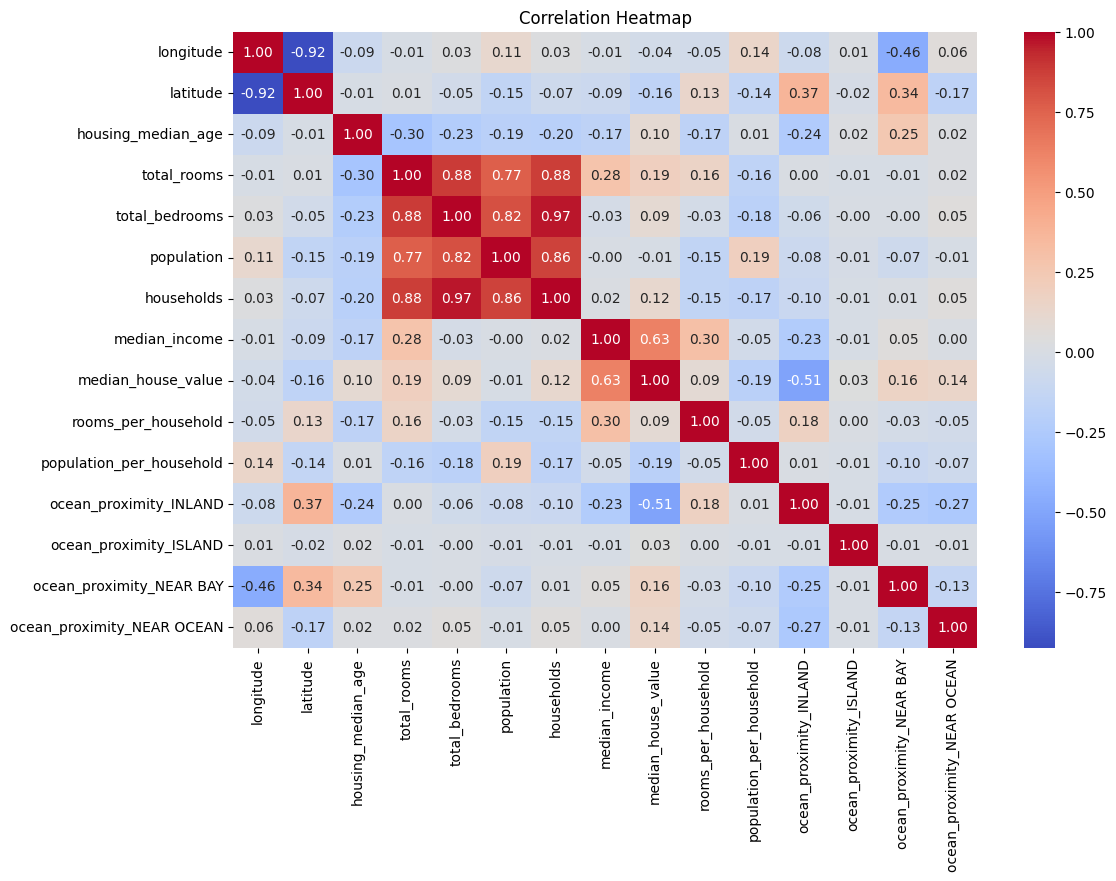

In [15]:
correlation_matrix = housing_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = housing_data[numerical_cols].drop(columns=['median_house_value'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print("\nVariance Inflation Factor (VIF) Analysis:")
print(vif_data)


Variance Inflation Factor (VIF) Analysis:
              Feature        VIF
0           longitude   9.004144
1            latitude   9.486034
2  housing_median_age   1.227811
3         total_rooms   9.476551
4      total_bedrooms  19.287775
5          population   4.191276
6          households  21.167115
7       median_income   2.144942


**Mutual Information**

In [17]:
from sklearn.metrics import mutual_info_score
import pandas as pd
housing_data['price_bins'] = pd.qcut(housing_data['median_house_value'], q=5, labels=False, duplicates='drop')

numerical_features = [col for col in housing_data.select_dtypes(include=['float64', 'int64']).columns
                      if col != 'median_house_value' and col != 'price_bins']

binned_features = {}
for feature in numerical_features:
    binned_features[feature] = pd.qcut(housing_data[feature], q=5, labels=False, duplicates='drop')
binned_df = pd.DataFrame(binned_features)
mutual_info_scores_binned = {feature: mutual_info_score(housing_data['price_bins'], binned_df[feature])
                             for feature in binned_df.columns}
mutual_info_df_binned = pd.DataFrame(list(mutual_info_scores_binned.items()),
                                     columns=['Feature', 'Mutual Information'])
mutual_info_df_binned = mutual_info_df_binned.sort_values(by='Mutual Information', ascending=False)
print(mutual_info_df_binned)

                    Feature  Mutual Information
7             median_income            0.236216
1                  latitude            0.068879
0                 longitude            0.059122
9  population_per_household            0.044898
8       rooms_per_household            0.034240
3               total_rooms            0.021343
6                households            0.009282
2        housing_median_age            0.008517
5                population            0.006397
4            total_bedrooms            0.005943


In [19]:
mutual_info_df = pd.DataFrame(list(mutual_info_scores_binned.items()),
                              columns=['Feature', 'Mutual Information'])
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

top_features = mutual_info_df['Feature'].head(10).tolist()
print(f"Top Features Based on Mutual Information: {top_features}")

Top Features Based on Mutual Information: ['median_income', 'latitude', 'longitude', 'population_per_household', 'rooms_per_household', 'total_rooms', 'households', 'housing_median_age', 'population', 'total_bedrooms']


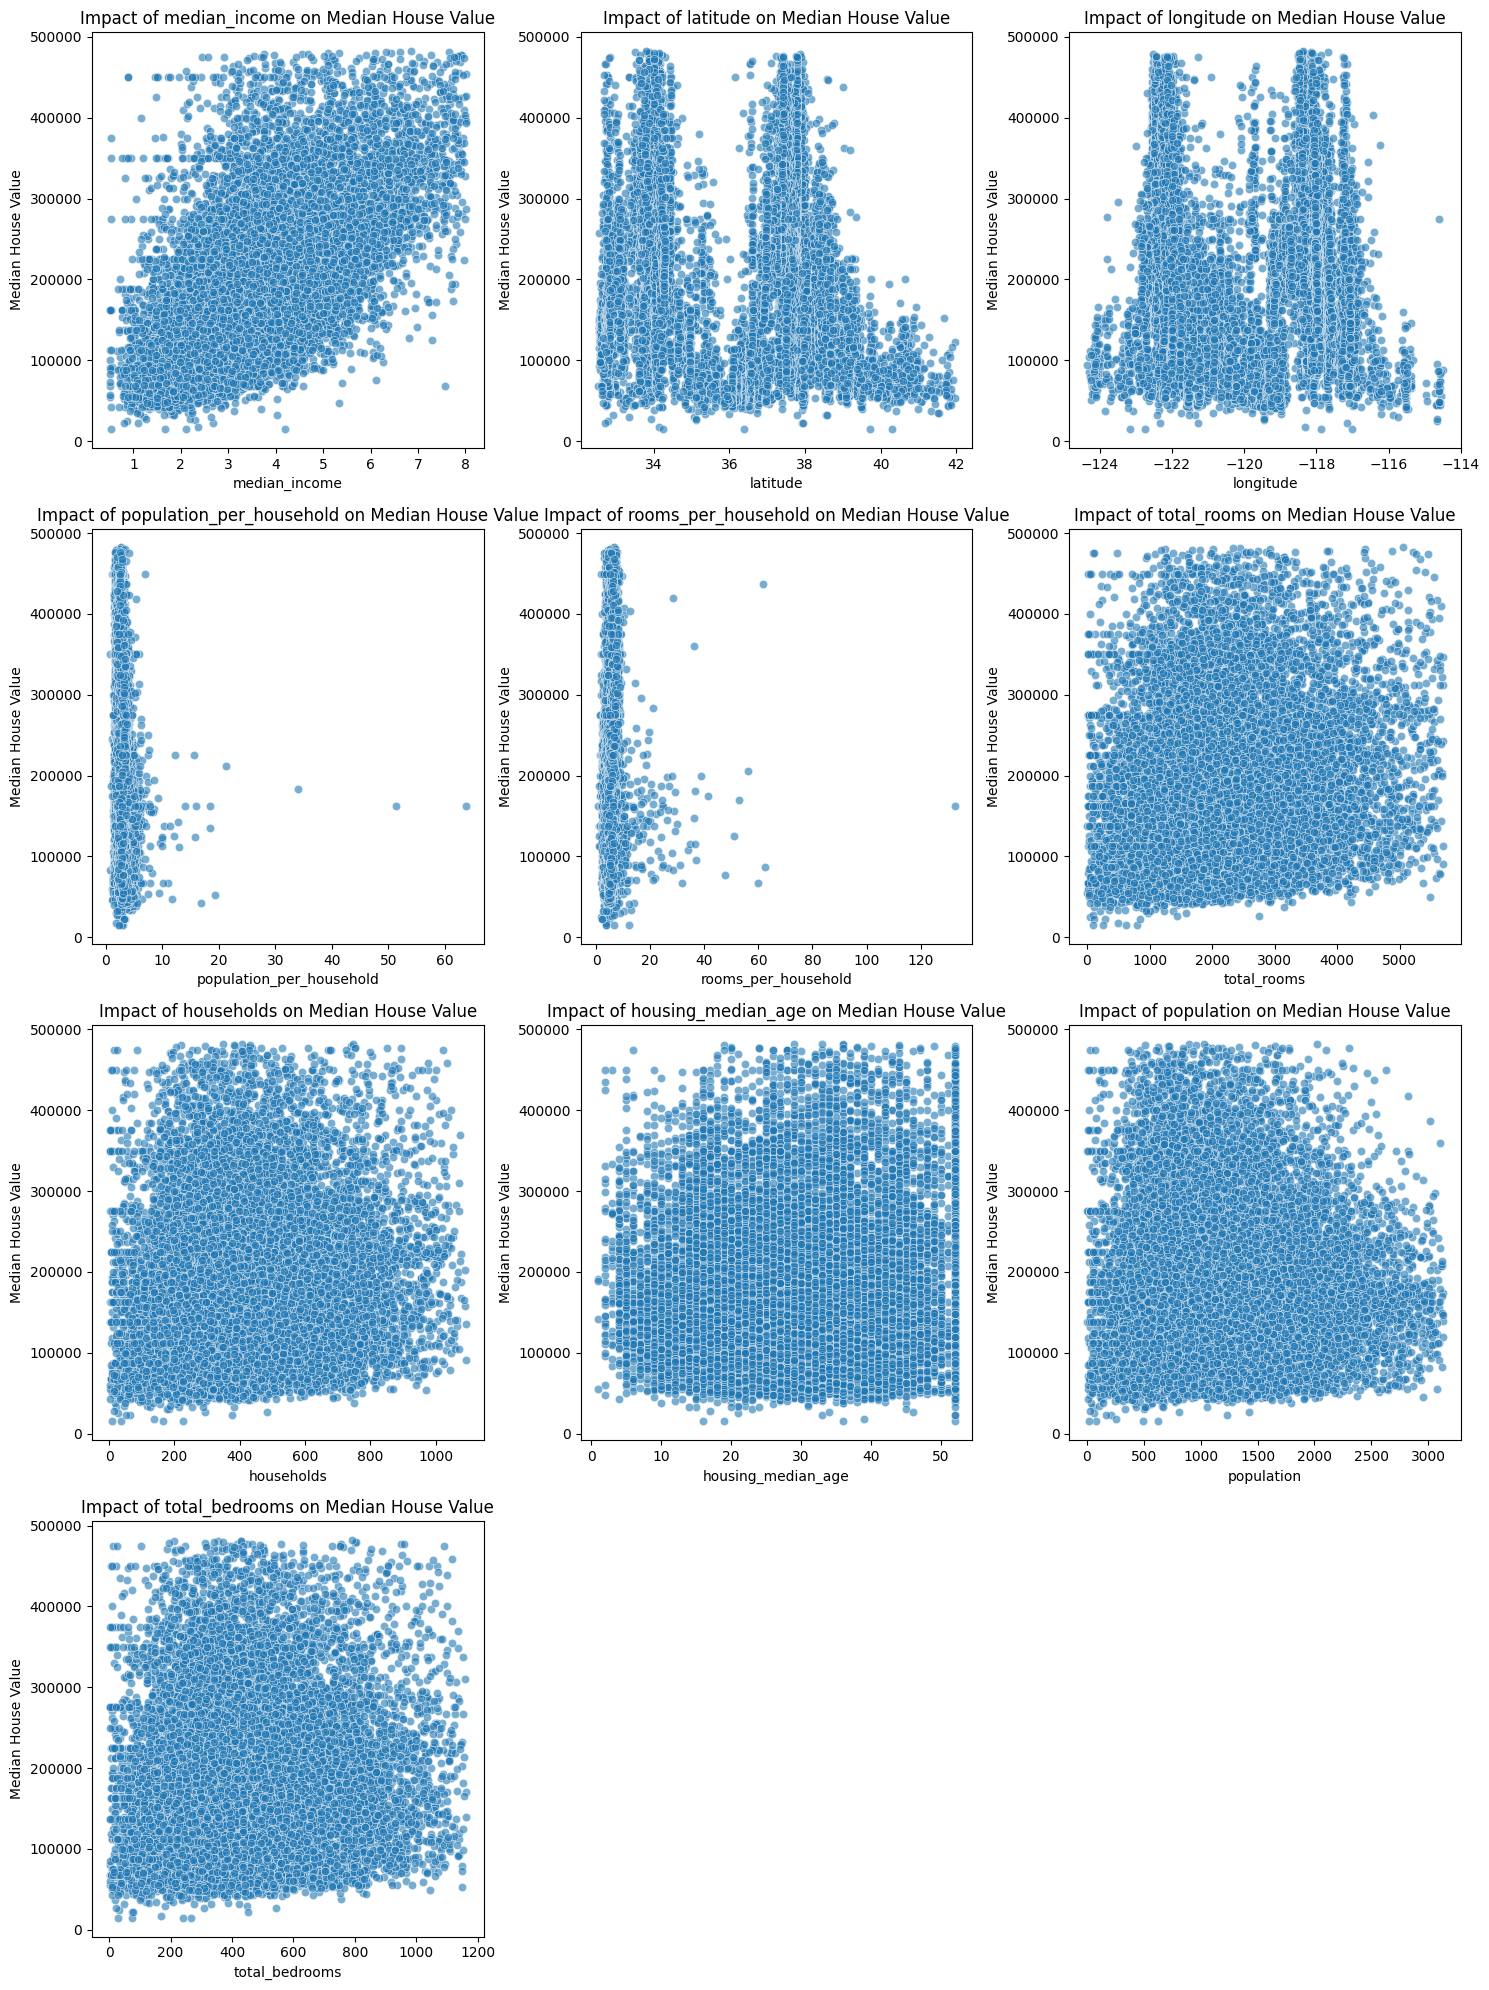

In [20]:
n_cols = 3
n_rows = (len(top_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    sns.scatterplot(data=housing_data, x=feature, y='median_house_value', alpha=0.6, ax=axes[i])
    axes[i].set_title(f"Impact of {feature} on Median House Value")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Median House Value")
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**PCA**

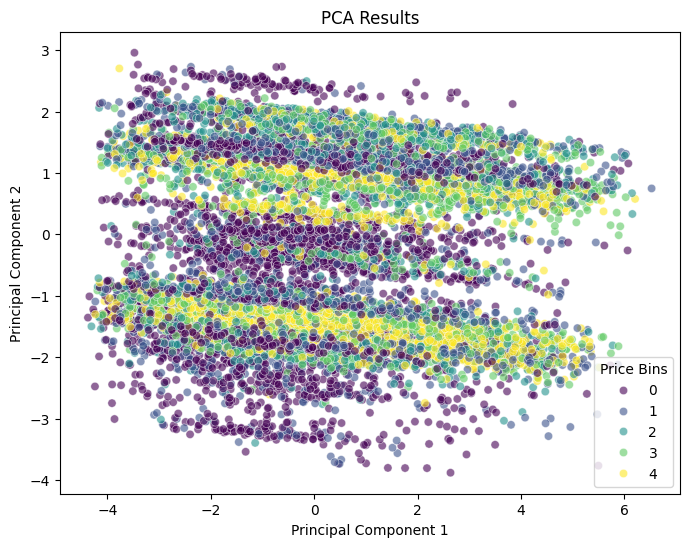

In [21]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['price_bins'] = housing_data['price_bins'].reset_index(drop=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='price_bins', palette='viridis', alpha=0.6)
plt.title("PCA Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Price Bins")
plt.show()

**t-SNE**

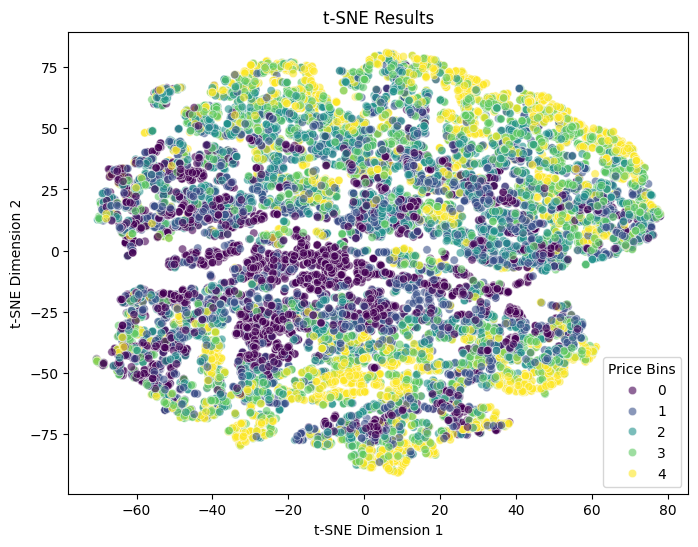

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
tsne_result = tsne.fit_transform(scaled_data)
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
tsne_df['price_bins'] = housing_data['price_bins'].reset_index(drop=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='price_bins', palette='viridis', alpha=0.6)
plt.title("t-SNE Results")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Price Bins")
plt.show()

**UMAP**

In [23]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


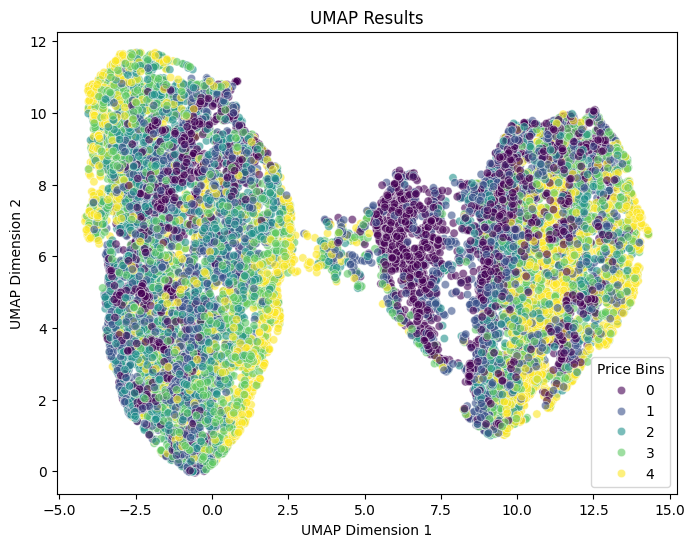

In [24]:
import umap

umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(scaled_data)
umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
umap_df['price_bins'] = housing_data['price_bins'].reset_index(drop=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='price_bins', palette='viridis', alpha=0.6)
plt.title("UMAP Results")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Price Bins")
plt.show()

**Explore Data Using Unsupervised Learning**

**Kmeans**

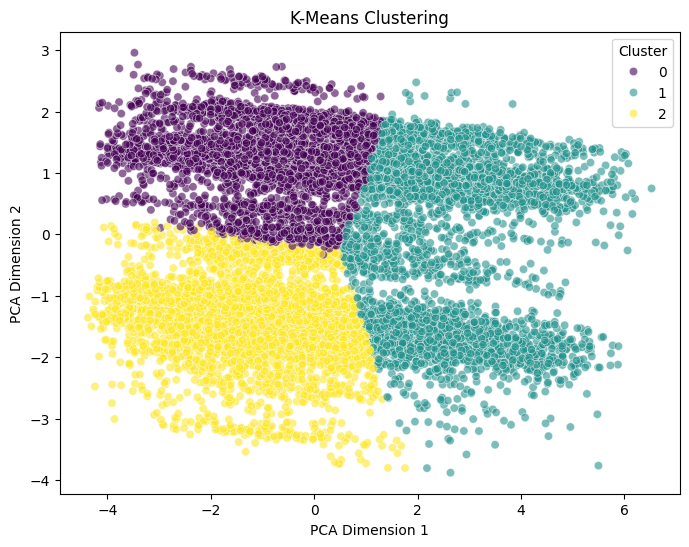

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
housing_data['kmeans_cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=housing_data['kmeans_cluster'], palette='viridis', alpha=0.6)
plt.title("K-Means Clustering")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend(title="Cluster")
plt.show()

**Hierarchical Clustering**

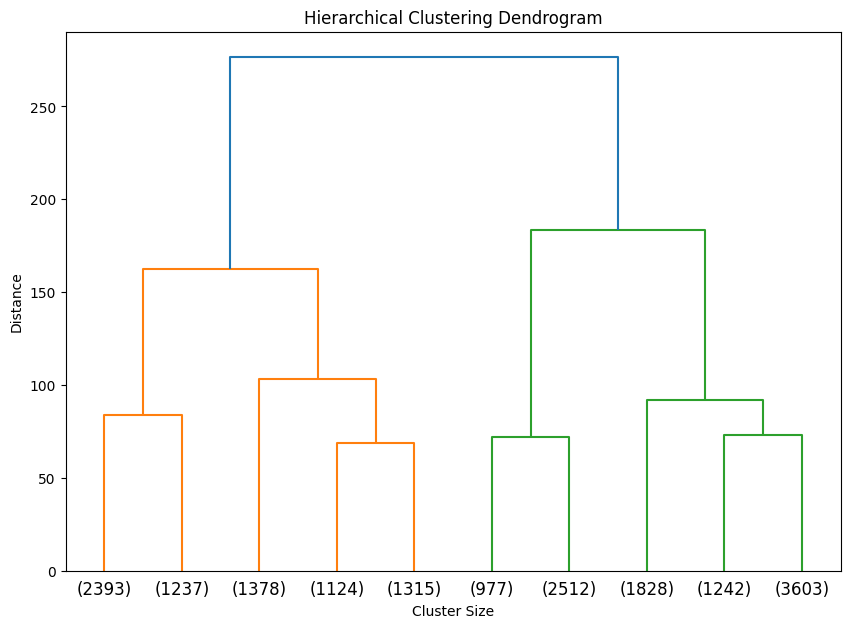

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

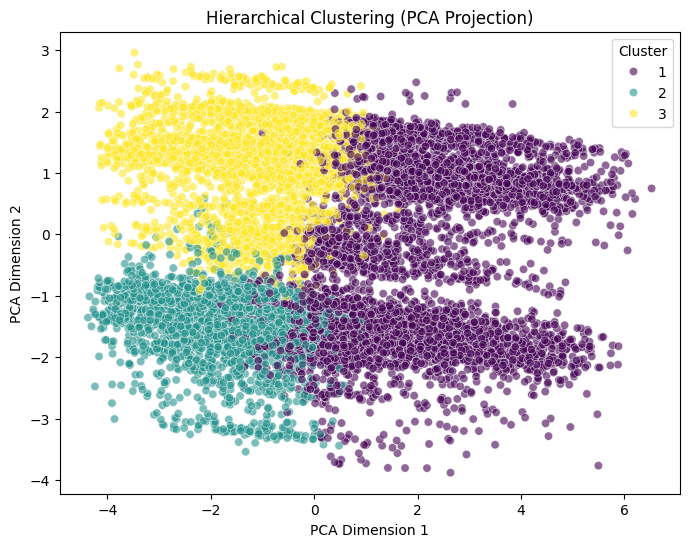

In [27]:
from scipy.cluster.hierarchy import fcluster
num_clusters = 3
housing_data['hierarchical_cluster'] = fcluster(linked, num_clusters, criterion='maxclust')
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=housing_data['hierarchical_cluster'], palette='viridis', alpha=0.6)
plt.title("Hierarchical Clustering (PCA Projection)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend(title="Cluster")
plt.show()

**Gaussian Mixture Models**

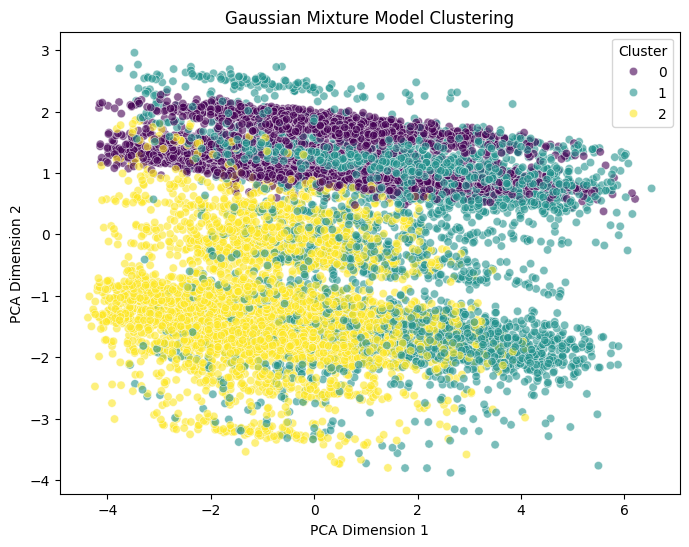

In [28]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=42)
housing_data['gmm_cluster'] = gmm.fit_predict(scaled_data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=housing_data['gmm_cluster'], palette='viridis', alpha=0.6)
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend(title="Cluster")
plt.show()

**Spectral Clustering**

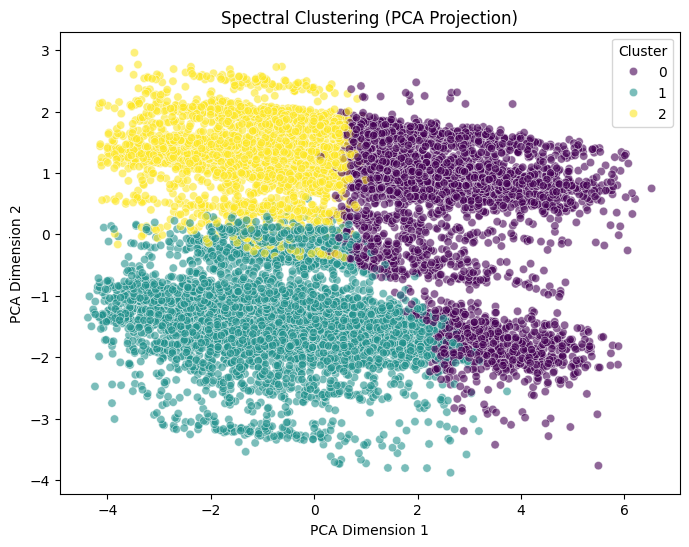

In [29]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42, n_neighbors=10)
housing_data['spectral_cluster'] = spectral.fit_predict(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=housing_data['spectral_cluster'], palette='viridis', alpha=0.6)
plt.title("Spectral Clustering (PCA Projection)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend(title="Cluster")
plt.show()

**Cross-Validation Strategy**

Our dataset contains a significant number of samples, making it ideal for K-Fold, as the folds will still have sufficient data for training and validation without much variance.
Regression Task:

In regression tasks like predicting median_house_value, K-Fold ensures every data point is part of both training and validation, providing a robust evaluation of the model.

**Train Models**

In [30]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
X = housing_data.drop(columns=['median_house_value'])
y = housing_data['median_house_value'] / 1000
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [32]:
# Training a simple model
from prettytable import PrettyTable
simple_model = GradientBoostingRegressor(random_state=42)
simple_model.fit(X_train, y_train)

y_val_pred = simple_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

table = PrettyTable()
table.field_names = ["Metric", "Value"]
table.add_row(["Validation MSE (Simple Model)", f"{val_mse:.2f}"])
table.add_row(["Validation R^2 (Simple Model)", f"{val_r2:.2f}"])
print(table)

+-------------------------------+--------+
|             Metric            | Value  |
+-------------------------------+--------+
| Validation MSE (Simple Model) | 677.06 |
| Validation R^2 (Simple Model) |  0.92  |
+-------------------------------+--------+


In [33]:
# Hyperparameter tuning using validation set
best_val_mse = np.inf
best_model = None

for learning_rate in [0.01, 0.05, 0.1]:
    for n_estimators in [50, 100, 200]:
        for max_depth in [3, 5]:
            model = GradientBoostingRegressor(
                learning_rate=learning_rate,
                n_estimators=n_estimators,
                max_depth=max_depth,
                random_state=42
            )
            model.fit(X_train, y_train)
            val_pred = model.predict(X_val)
            current_val_mse = mean_squared_error(y_val, val_pred)
            if current_val_mse < best_val_mse:
                best_val_mse = current_val_mse
                best_model = model
                best_params = {
                    'learning_rate': learning_rate,
                    'n_estimators': n_estimators,
                    'max_depth': max_depth
                }
print(f"{'Metric':<25} {'Value'}")
print(f"{'-'*40}")
print(f"{'Best Validation MSE':<25} {best_val_mse:.2f}")
print(f"{'Best Hyperparameters':<25} {best_params}")

Metric                    Value
----------------------------------------
Best Validation MSE       603.43
Best Hyperparameters      {'learning_rate': 0.1, 'n_estimators': 200, 'max_depth': 5}


In [34]:
#Analyzing performance using cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X_train_val, y_train_val, scoring='neg_mean_squared_error', cv=kf)

cv_mse_scores = -cv_scores
print(f"Cross-Validation MSE Scores: {cv_mse_scores}")
print(f"Mean CV MSE: {np.mean(cv_mse_scores):.2f}")
print(f"Standard Deviation CV MSE: {np.std(cv_mse_scores):.2f}")

Cross-Validation MSE Scores: [623.68049622 549.72394035 608.94628636 553.25093915 589.98016552]
Mean CV MSE: 585.12
Standard Deviation CV MSE: 29.48


In [35]:
# Evaluating the model on the test set
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

table = PrettyTable()
table.field_names = ["Metric", "Value"]
table.add_row(["Test MSE (Tuned Model)", f"{test_mse:.2f}"])
table.add_row(["Test R^2 (Tuned Model)", f"{test_r2:.2f}"])
print(table)

+------------------------+--------+
|         Metric         | Value  |
+------------------------+--------+
| Test MSE (Tuned Model) | 608.56 |
| Test R^2 (Tuned Model) |  0.93  |
+------------------------+--------+


In [36]:
# Using Gradient Boosting with regularization
model_reg = GradientBoostingRegressor(
    random_state=42,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    min_samples_split=5,
    min_samples_leaf=3
)
model_reg.fit(X_train, y_train)
y_val_pred_reg = model_reg.predict(X_val)
val_mse_reg = mean_squared_error(y_val, y_val_pred_reg)
val_r2_reg = r2_score(y_val, y_val_pred_reg)

table = PrettyTable()
table.field_names = ["Metric", "Value"]
table.add_row(["Validation MSE (Regularized Model)", f"{val_mse_reg:.2f}"])
table.add_row(["Validation R^2 (Regularized Model)", f"{val_r2_reg:.2f}"])
print(table)

+------------------------------------+--------+
|               Metric               | Value  |
+------------------------------------+--------+
| Validation MSE (Regularized Model) | 591.53 |
| Validation R^2 (Regularized Model) |  0.93  |
+------------------------------------+--------+


In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
pipeline_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('gbr', GradientBoostingRegressor(random_state=42))
])

pipeline_poly.fit(X_train, y_train)

y_val_pred_poly = pipeline_poly.predict(X_val)
val_mse_poly = mean_squared_error(y_val, y_val_pred_poly)
val_r2_poly = r2_score(y_val, y_val_pred_poly)

table = PrettyTable()
table.field_names = ["Metric", "Value"]
table.add_row(["Validation MSE (Polynomial Features)", f"{val_mse_poly:.2f}"])
table.add_row(["Validation R^2 (Polynomial Features)", f"{val_r2_poly:.2f}"])
print(table)

+--------------------------------------+--------+
|                Metric                | Value  |
+--------------------------------------+--------+
| Validation MSE (Polynomial Features) | 648.15 |
| Validation R^2 (Polynomial Features) |  0.93  |
+--------------------------------------+--------+


In [38]:
from xgboost import XGBRegressor

# Initializing and training an XGBoost Regressor
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    alpha=1,
    lambda_=1,
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_val_pred_xgb = xgb_model.predict(X_val)
val_mse_xgb = mean_squared_error(y_val, y_val_pred_xgb)
val_r2_xgb = r2_score(y_val, y_val_pred_xgb)

table = PrettyTable()
table.field_names = ["Metric", "Value"]
table.add_row(["Validation MSE (XGBoost)", f"{val_mse_xgb:.2f}"])
table.add_row(["Validation R^2 (XGBoost)", f"{val_r2_xgb:.2f}"])
print(table)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:01:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)


+--------------------------+--------+
|          Metric          | Value  |
+--------------------------+--------+
| Validation MSE (XGBoost) | 600.12 |
| Validation R^2 (XGBoost) |  0.93  |
+--------------------------+--------+


In [39]:
# Feature engineering: Adding interaction terms and transformations
X_train['rooms_per_household'] = X_train['total_rooms'] / X_train['households']
X_train['bedrooms_per_room'] = X_train['total_bedrooms'] / X_train['total_rooms']
X_train['population_per_household'] = X_train['population'] / X_train['households']
X_train['log_median_income'] = np.log1p(X_train['median_income'])

X_val['rooms_per_household'] = X_val['total_rooms'] / X_val['households']
X_val['bedrooms_per_room'] = X_val['total_bedrooms'] / X_val['total_rooms']
X_val['population_per_household'] = X_val['population'] / X_val['households']
X_val['log_median_income'] = np.log1p(X_val['median_income'])

model_interaction = GradientBoostingRegressor(random_state=42, n_estimators=200, max_depth=5, learning_rate=0.1)
model_interaction.fit(X_train, y_train)

y_val_pred_interaction = model_interaction.predict(X_val)
val_mse_interaction = mean_squared_error(y_val, y_val_pred_interaction)
val_r2_interaction = r2_score(y_val, y_val_pred_interaction)

table = PrettyTable()
table.field_names = ["Metric", "Value"]
table.add_row(["Validation MSE (Feature Interaction)", f"{val_mse_interaction:.2f}"])
table.add_row(["Validation R^2 (Feature Interaction)", f"{val_r2_interaction:.2f}"])
print(table)

+--------------------------------------+--------+
|                Metric                | Value  |
+--------------------------------------+--------+
| Validation MSE (Feature Interaction) | 602.11 |
| Validation R^2 (Feature Interaction) |  0.93  |
+--------------------------------------+--------+


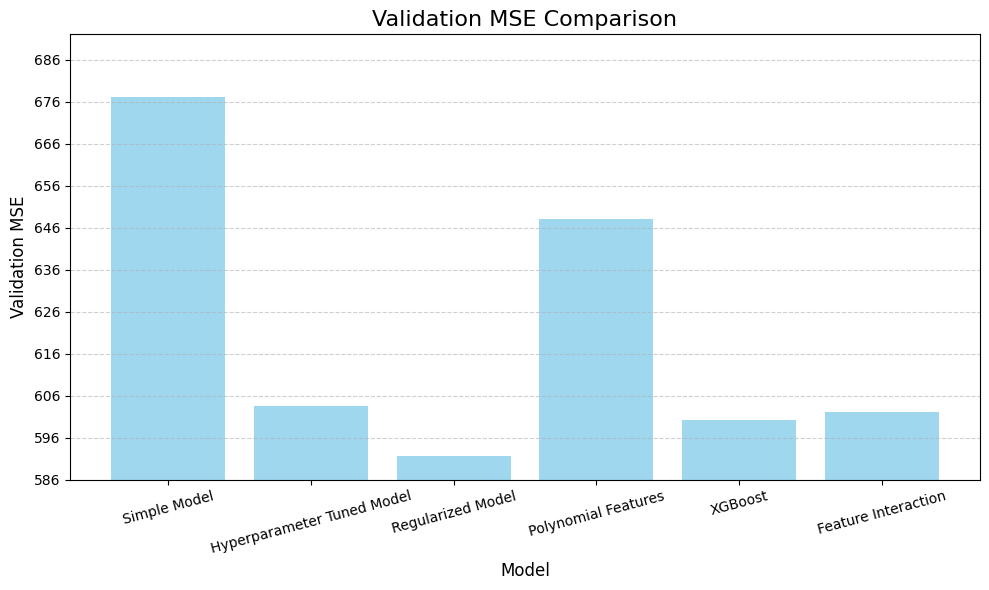

In [48]:
models = [
    "Simple Model",
    "Hyperparameter Tuned Model",
    "Regularized Model",
    "Polynomial Features",
    "XGBoost",
    "Feature Interaction"
]
mse_values = [
    val_mse,
    best_val_mse,
    val_mse_reg,
    val_mse_poly,
    val_mse_xgb,
    val_mse_interaction
]

# Plotting Validation MSE Comparison
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='skyblue', alpha=0.8)
plt.title("Validation MSE Comparison", fontsize=16)
plt.ylabel("Validation MSE", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=15, fontsize=10)

min_y = min(mse_values) - 5 if min(mse_values) > 5 else 0
max_y = max(mse_values) + 15
plt.ylim(min_y, max_y)
plt.yticks(range(int(min_y), int(max_y) + 1, 10))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()